### OGTIP Oeson - Data Science Internship
# Final Project

## Project Description

The image dataset is the real data taken from a popular photo studio that contains image records from different photgraphers. The task is to do a complete data analysis on the dataset that contains photographs from different photgraphers stored at the same location.

In this notebook, we will develop a machine learning model for identifying  different categories of the photographs. It is an unlabelled dataset so provide necessary labelling to the pictures.

- Preparing the dataset.
- Deploy the algorithm for implementation
- Optimize the learning parameters for model performance

#### References

https://github.com/ThongLai/oeson-final-project-image-classification

## Dependencies and Setup

In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

## Load Data

### Configure our training data
For this project we will use a studio's image dataset with different topics. So, the outcome of this process is a trained model capable of classifying all the categories from this dataset.

#### CLASSES

  1. Architecture
  2. Art and Culture
  3. Food and Drinks
  4. Travel and Adventure

In [2]:
labels = ["architecture", "art and culture", "food and drinks", "travel and adventure"]

In [3]:
data = tf.keras.utils.image_dataset_from_directory('imagedataset', image_size=(128, 128), label_mode='categorical')

Found 35093 files belonging to 4 classes.


In [4]:
data_iterator = data.as_numpy_iterator()

In [5]:
batch = data_iterator.next()

C:\Users\LMT\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


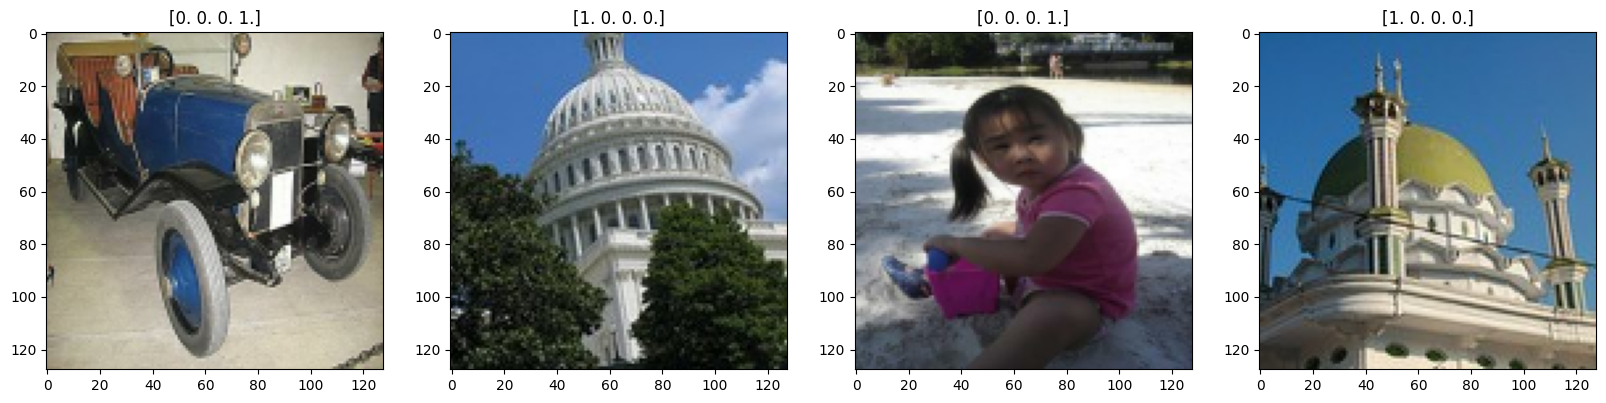

In [6]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## Scale Data

In [7]:
data = data.map(lambda x,y: (x/255, y))

In [8]:
data.as_numpy_iterator().next()

(array([[[[0.37254903, 0.38039216, 0.3764706 ],
          [0.29803923, 0.30588236, 0.3019608 ],
          [0.17254902, 0.18039216, 0.1764706 ],
          ...,
          [0.3764706 , 0.63529414, 0.8627451 ],
          [0.37254903, 0.6313726 , 0.85882354],
          [0.36862746, 0.627451  , 0.85490197]],
 
         [[0.35686275, 0.3647059 , 0.36078432],
          [0.3137255 , 0.32156864, 0.31764707],
          [0.21568628, 0.22352941, 0.21960784],
          ...,
          [0.38039216, 0.6392157 , 0.8666667 ],
          [0.3764706 , 0.63529414, 0.8627451 ],
          [0.37254903, 0.6313726 , 0.85882354]],
 
         [[0.34901962, 0.34901962, 0.34901962],
          [0.30980393, 0.30980393, 0.30980393],
          [0.23529412, 0.23921569, 0.24705882],
          ...,
          [0.38431373, 0.64705884, 0.8627451 ],
          [0.38431373, 0.64705884, 0.8627451 ],
          [0.38039216, 0.6431373 , 0.85882354]],
 
         ...,
 
         [[0.43529412, 0.46666667, 0.50980395],
          [0.40392

## Split Data

In [9]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [10]:
train_size

767

In [11]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [12]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))>

## Build Deep Learning Model

In [13]:
model = Sequential()

In [14]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [15]:
model.compile('adam', loss=tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 64)                3

## Train

In [17]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs")

In [18]:
hist = model.fit(train, epochs=3, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/3
767/767 [==============================] - 98s 124ms/step - loss: 0.8747 - accuracy: 0.6508 - val_loss: 0.5875 - val_accuracy: 0.7731
Epoch 2/3
767/767 [==============================] - 97s 126ms/step - loss: 0.5294 - accuracy: 0.8033 - val_loss: 0.4942 - val_accuracy: 0.8131
Epoch 3/3
767/767 [==============================] - 97s 126ms/step - loss: 0.3679 - accuracy: 0.8651 - val_loss: 0.5184 - val_accuracy: 0.8132


## Plot Performance

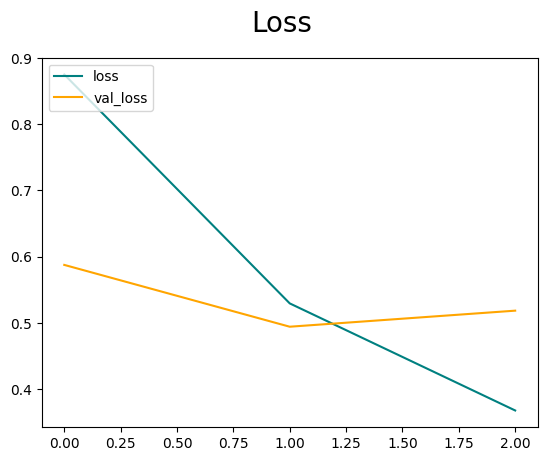

In [19]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

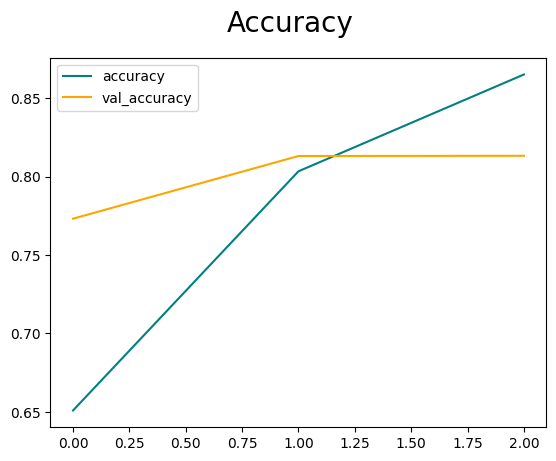

In [20]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## Evaluate

In [21]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [22]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 24ms/step


In [23]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.8281818, shape=(), dtype=float32) tf.Tensor(0.7835436, shape=(), dtype=float32) tf.Tensor(0.80733943, shape=(), dtype=float32)


## Test

In [24]:
batch_test = test.as_numpy_iterator().next()

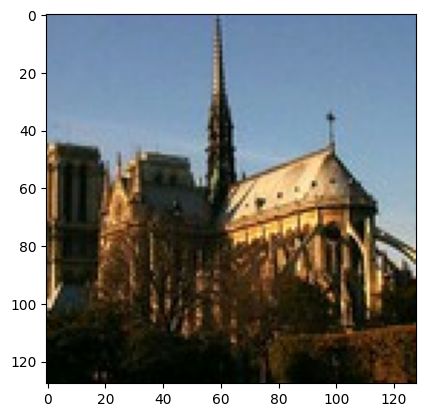

In [39]:
img = batch_test[0][1]
img_label = batch_test[1][1]
plt.imshow(img)
plt.show()

In [40]:
yhat = model.predict(np.expand_dims(img/255, 0))

1/1 [==============================] - 0s 26ms/step


In [41]:
yhat

array([[0.4677478 , 0.31252268, 0.02449411, 0.1952354 ]], dtype=float32)

In [42]:
print("Result: " + labels[np.argmax(yhat)])

Result: architecture


In [43]:
print("True label: " + labels[np.argmax(img_label)])

True label: architecture


## Save the Model

In [44]:
from tensorflow.keras.models import load_model

In [45]:
model.save(os.path.join('models','imageclassifier.4classes'))

INFO:tensorflow:Assets written to: models\imageclassifier.4classes\assets


INFO:tensorflow:Assets written to: models\imageclassifier.4classes\assets


In [46]:
new_model = load_model('models/imageclassifier.4classes')

In [47]:
new_model.predict(np.expand_dims(img/255, 0))

1/1 [==============================] - 0s 72ms/step


array([[0.4677478 , 0.31252268, 0.02449411, 0.1952354 ]], dtype=float32)